<a href="https://colab.research.google.com/github/slimf1/ZZ3-DL/blob/main/03_CNN_Keras_etud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Réseau convolutif

Objectif : construction d'un réseau convolutif simple avec Keras. 
De nombreuses possibilités d'amélioration :
- optimisation du nombre de couches / noyaux / activations
- architecture
- régularisation
- ...

Ressources utiles: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

# Conversion en matrices binaires
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Définition du réseau

## Paramètres

In [3]:
lr = 0.001
num_epochs = 25
batch_size = 128
dropout = 0.75 # ici probabilité de garder le neurone

## Types de couches

## Modèle du réseau construit 
CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING-FCL-Dropout-Prediction

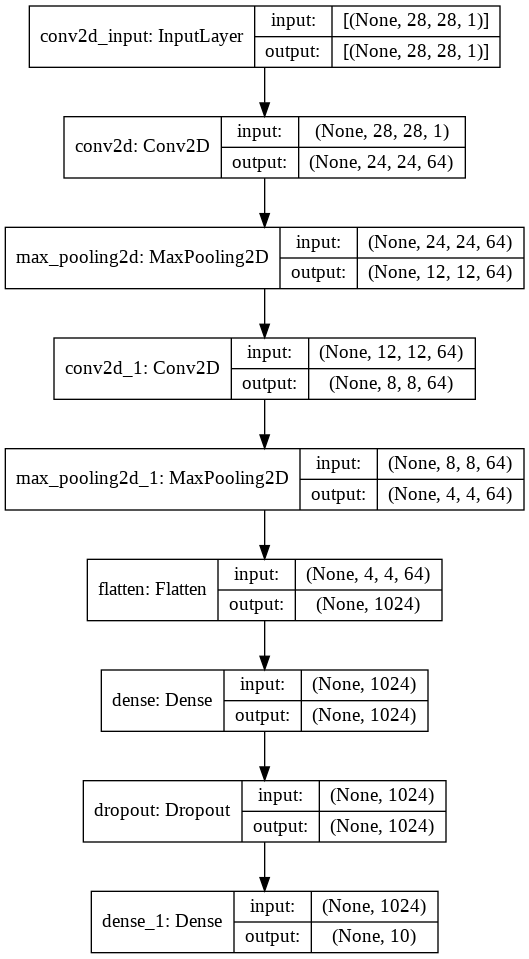

In [4]:
model = Sequential()

# model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Dropout(dropout))
# model.add(Dense(num_classes, activation="softmax"))

model.add(Conv2D(64, kernel_size=(5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation="softmax"))

# model.summary()
plot_model(model, show_shapes=True)

## Fonction de coût et optimisation

In [5]:
opt = Adam(learning_rate=lr)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt, 
    metrics=["acc"]
)

# Entraînement du réseau

In [6]:
hist = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1
)

Epoch 1/25
422/422 [==============================] - 7s 13ms/step - loss: 0.2141 - acc: 0.9325 - val_loss: 0.0453 - val_acc: 0.9855
Epoch 2/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0608 - acc: 0.9814 - val_loss: 0.0289 - val_acc: 0.9920
Epoch 3/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0258 - val_acc: 0.9923
Epoch 4/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0316 - val_acc: 0.9912
Epoch 5/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0285 - val_acc: 0.9918
Epoch 6/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0258 - acc: 0.9923 - val_loss: 0.0279 - val_acc: 0.9933
Epoch 7/25
422/422 [==============================] - 5s 11ms/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0288 - val_acc: 0.9940
Epoch 8/25
422/422 [==============================] - 5s 11ms/step - 

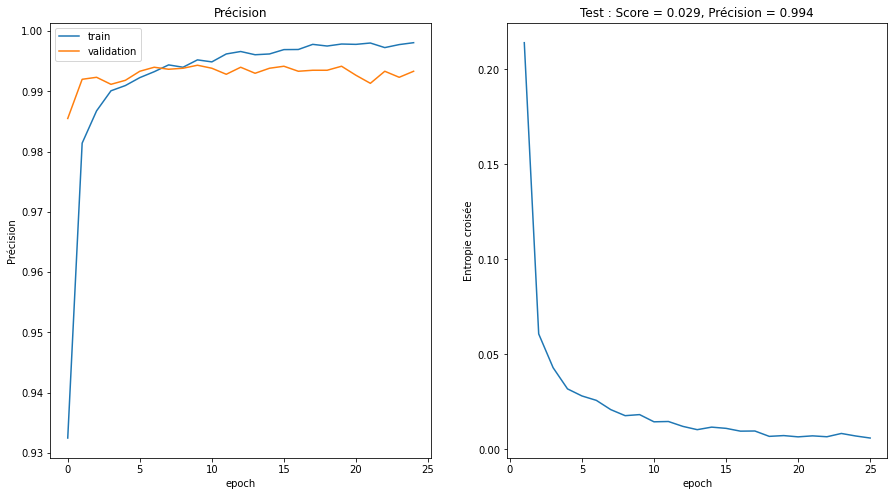

<Figure size 432x288 with 0 Axes>

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

Nombre d'erreurs 59/10000




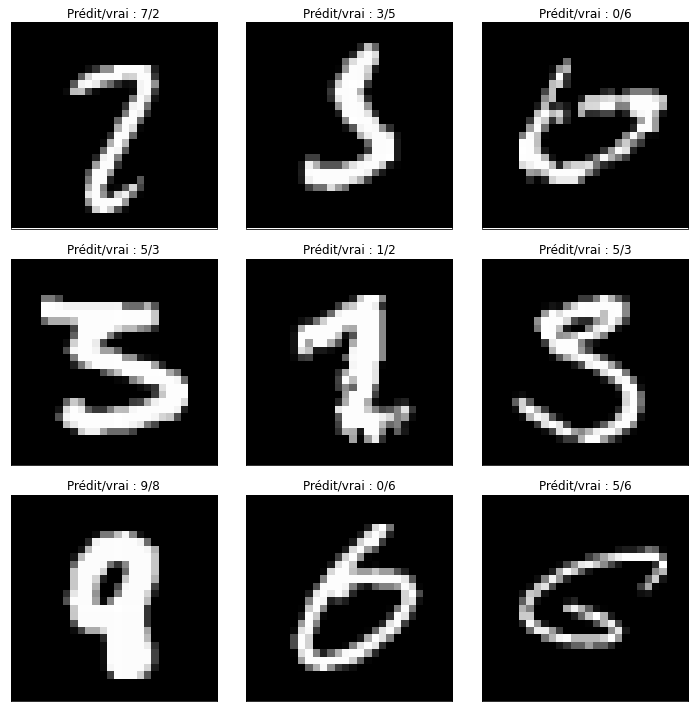

In [8]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
